In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies=pd.read_csv('c:/Users/Buabeng/Desktop/1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [7]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [8]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [9]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

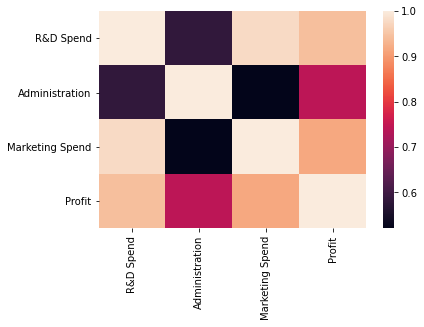

In [10]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [13]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

IndexError: index 3 is out of bounds for axis 1 with size 3

In [12]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([  89790.61532915,   88427.07187361,   94894.67836972,
        175680.86725611,   83411.73042088,  110571.90200074,
        132145.22936439,   91473.37719686,  164597.05380606,
         53222.82667401,   66950.19050989,  150566.43987005,
        126915.20858596,   59337.8597105 ,  177513.91053062,
         75316.28143051,  118248.14406603,  164574.40699902,
        170937.2898107 ,  182069.11645084,  118845.03252689,
         85669.95112229,  180992.59396144,   84145.08220145,
        105005.83769214,  101233.56772747,   53831.07669091,
         56881.41475224,   68896.39346905,  210040.00765883,
        120778.72270894,  111724.87157654,  101487.90541518,
        137959.02649624,   63969.95996743,  108857.91214126,
        186014.72531988,  171442.64130747,  174644.26529205,
        117671.49128195,   96731.37857433,  165452.25779409,
        107724.34331255,   50194.54176913,  116513.89532179,
         58632.4898682 ,  158416.4682761 ,   78541.48521609,
        159727.66671743,

In [12]:
# Calculating the Coefficients
print(regressor.coef_)

[ -8.80536598e+02  -6.98169073e+02   5.25845857e-01   8.44390881e-01
   1.07574255e-01]


In [13]:
# Calculating the Intercept
print(regressor.intercept_)

-51035.229724


In [14]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.91126958922688628